### 6 April Assignment Solution

### Q1. What is the mathematical formula for a linear SVM?

The mathematical formula for a linear SVM is given by the decision boundary:

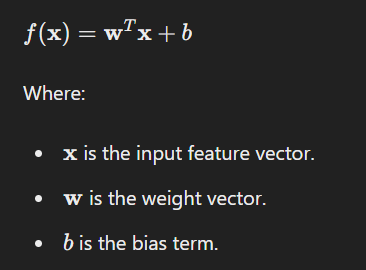

### Q2. What is the objective function of a linear SVM?
The objective function of a linear SVM is to find the hyperplane that maximizes the margin between the two classes. This can be expressed as a convex optimization problem:

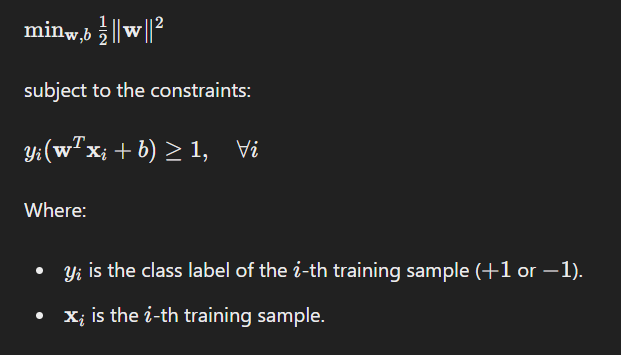

### Q3. What is the kernel trick in SVM?
The kernel trick allows SVMs to create non-linear decision boundaries. Instead of directly mapping the input features to a higher-dimensional space, the kernel trick uses a kernel function to implicitly perform this mapping. Common kernel functions include:

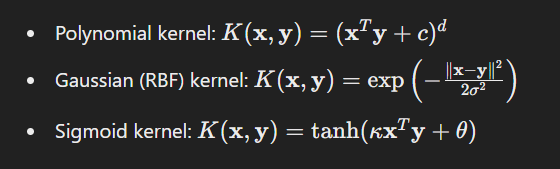


### Q4. What is the role of support vectors in SVM? Explain with an example

Support vectors are the data points that lie closest to the decision boundary (or hyperplane). These points are critical because they determine the position and orientation of the hyperplane. In other words, the SVM algorithm focuses only on these points to find the optimal hyperplane, ignoring the rest of the data points.

#### Example:

Consider a 2D classification problem with two classes:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Create a simple dataset
X = np.array([[2, 3], [1, 1], [2, 1], [3, 2], [7, 8], [8, 8], [9, 9], [6, 7]])
y = np.array([1, 1, 1, 1, -1, -1, -1, -1])

# Fit the SVM model
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

# Get support vectors
support_vectors = clf.support_vectors_

# Plot the dataset and support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', linewidths=2)
plt.title('Support Vectors in SVM')
plt.show()
```

In this plot, the support vectors are highlighted with a black border.



### Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM

#### Hyperplane and Marginal Plane

The hyperplane is the decision boundary that separates the two classes. The marginal planes are the planes parallel to the hyperplane that pass through the support vectors.

#### Soft Margin vs. Hard Margin

- **Hard Margin:** All data points must be correctly classified, and no points can lie within the margin. This approach is only feasible when the data is linearly separable.

- **Soft Margin:** Some points are allowed to lie within the margin or even be misclassified. This is useful when dealing with noisy data or data that is not linearly separable.

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate synthetic dataset
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) - [2, 2], np.random.randn(10, 2) + [2, 2]]
Y = [0] * 10 + [1] * 10

# Fit the SVM model with hard margin
clf_hard = svm.SVC(kernel='linear', C=1e10)
clf_hard.fit(X, Y)

# Fit the SVM model with soft margin
clf_soft = svm.SVC(kernel='linear', C=1)
clf_soft.fit(X, Y)

# Plotting
def plot_svm(clf, X, Y, title):
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # Plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot_svm(clf_hard, X, Y, 'Hard Margin SVM')

plt.subplot(1, 2, 2)
plot_svm(clf_soft, X, Y, 'Soft Margin SVM')

plt.show()
```

In these plots:
- The solid line represents the hyperplane.
- The dashed lines represent the marginal planes.
- Support vectors are highlighted with a black border.

The hard margin SVM will have a very strict separation, while the soft margin SVM allows some points to be within the margin or misclassified, providing a more flexible boundary, especially in the presence of noise.

### Ans 6:

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset= load_iris()


In [3]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target']=dataset.target

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

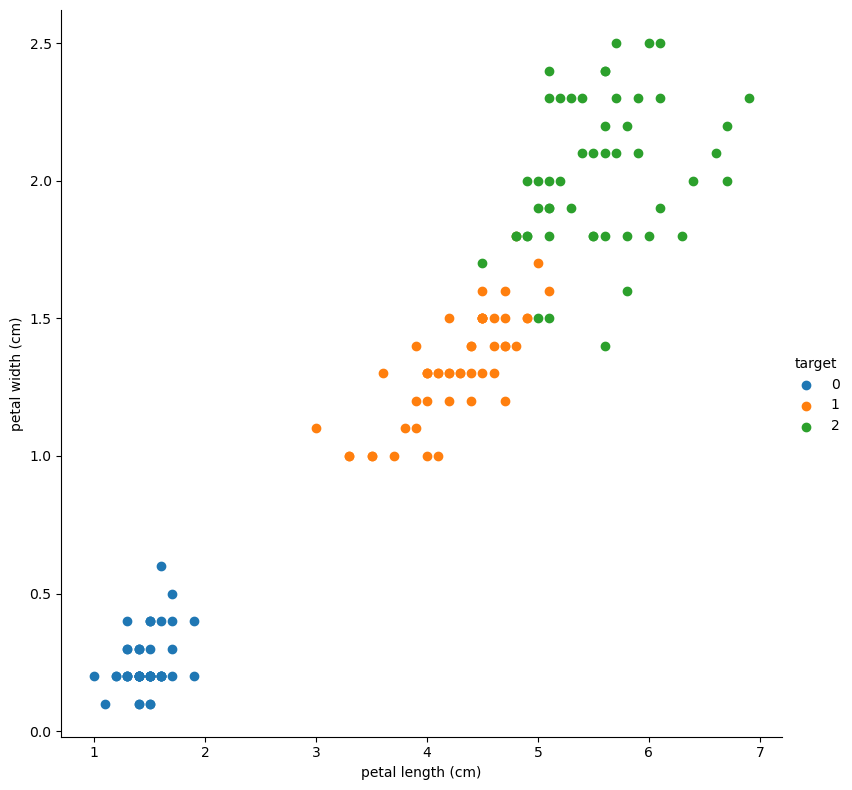

In [9]:
sns.FacetGrid(df,hue="target",height=8).map(plt.scatter,"petal length (cm)","petal width (cm)").add_legend()

In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [11]:
from sklearn.svm import SVC

In [12]:
svc=SVC(kernel='linear',C=1)

In [13]:
svc.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [14]:
svc.coef_

array([[-0.04619348,  0.52133922, -1.00307924, -0.4641441 ],
       [ 0.04016251,  0.17403771, -0.55692011, -0.24365261],
       [ 0.81534546,  0.82638331, -1.93619552, -2.00712353]])

In [15]:
y_pred = svc.predict(X_test)

In [16]:
y_pred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2])

In [17]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [18]:
score=accuracy_score(y_test,y_pred)
print(score)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[11  0  0]
 [ 0 15  0]
 [ 0  0 12]]


### Hyperparameter tuning with SVC

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
parameters= {'C' : [0.1,1,10,100,1000],
             'gamma' : [1,0.1,0.01,0.001,0.0001]
            }

In [21]:
grid = GridSearchCV(SVC() , param_grid=parameters, refit= True , cv=5 , verbose=3)

In [22]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.870 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.957 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.955 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.955 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.826 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.957 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.955 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.955 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.955 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.652 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [23]:
grid.best_params_

{'C': 10, 'gamma': 0.1}

In [24]:
### Prediction 

y_pred = grid.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38

[[11  0  0]
 [ 0 14  1]
 [ 0  0 12]]
0.9736842105263158


### Tunning parameters 

In [25]:
X1=df.iloc[:,0:2]
y1=df.iloc[:,-1]
X1

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [26]:
y1

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [38]:
X1['sepal width (cm)']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

In [27]:
from sklearn.svm import SVC

In [42]:
def MySVMClassifier( my_kernel, my_C, my_gamma):
    
    svc1 = SVC(kernel=my_kernel, C=my_C,gamma=my_gamma)
    svc1.fit(X1, y1)
    
    h=0.02
    x_min, x_max = X1['sepal length (cm)'].min() - 1, X1['sepal length (cm)'].max() + 1
    y_min, y_max = X1['sepal width (cm)'].min() - 1, X1['sepal width (cm)'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
 
    plt.subplot(1, 1, 1)
    Z = svc1.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X1['sepal length (cm)'], X1['sepal width (cm)'], c=y)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.show() 

In [43]:
from ipywidgets import interact

In [44]:
i = interact(MySVMClassifier, my_kernel=['linear','rbf'],my_C=(0.001,10), my_gamma=(1,100))

interactive(children=(Dropdown(description='my_kernel', options=('linear', 'rbf'), value='linear'), FloatSlide…